In [59]:
year="2018"
month="8"
day="23"
hour="23"


data = sqlContext.read.json("/data/year="+year+"/month="+month+"/day="+day+"/hour="+hour+"/dump.json")

In [61]:
data = data.filter(data['origin'] == 'packet_counter').orderBy('timestamp')

data.show()

+----------+--------+--------------+------------+---------+-------------------+----+-----+---+----+
|byte_count|duration|        origin|packet_count|switch_id|          timestamp|year|month|day|hour|
+----------+--------+--------------+------------+---------+-------------------+----+-----+---+----+
|      null|       6|packet_counter|           0|        3|1.535058258183678E9|2018|    8| 23|  23|
|      null|       6|packet_counter|           0|        2|1.535058258196733E9|2018|    8| 23|  23|
|      null|       6|packet_counter|           0|        1|1.535058258199396E9|2018|    8| 23|  23|
|      null|       6|packet_counter|           0|        4|1.535058258203423E9|2018|    8| 23|  23|
|      null|       6|packet_counter|          33|        2|1.535058264713519E9|2018|    8| 23|  23|
|      null|       6|packet_counter|          34|        4|1.535058264719759E9|2018|    8| 23|  23|
|      null|       6|packet_counter|          49|        1|1.535058264720537E9|2018|    8| 23|  23|


In [62]:
%matplotlib notebook

import matplotlib.pyplot as plt
import sys
import pandas as pd
import matplotlib


In [63]:
column = 'packet_count'

s1 = [row[column] for row in data.filter(data['switch_id'] == 1).select(column).collect()]
s2 = [row[column] for row in data.filter(data['switch_id'] == 2).select(column).collect()]
s3 = [row[column] for row in data.filter(data['switch_id'] == 3).select(column).collect()]
s4 = [row[column] for row in data.filter(data['switch_id'] == 4).select(column).collect()]

s = { 's1': s1, 's2': s2, 's3': s3, 's4': s4 }

<IPython.core.display.Javascript object>


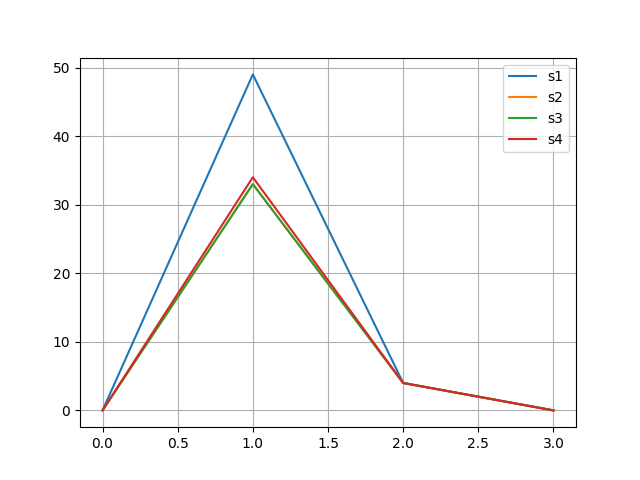

In [65]:
df = pd.DataFrame(data=s, columns=['s1', 's2', 's3', 's4'])

df.plot(grid=True)